# Image Reshape Permutation

image come from [https://www.pexels.com/photo/animal-biology-bloom-blossom-460067/](https://www.pexels.com/photo/animal-biology-bloom-blossom-460067/)

image (alex-tai-FKf4ixzVz_8-unsplash.jpg) Photo by Alex Tai on Unsplash come from [https://unsplash.com/photos/FKf4ixzVz_8](https://unsplash.com/photos/FKf4ixzVz_8)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import itertools

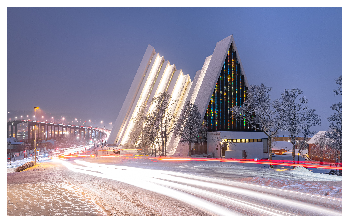

In [2]:
# Img = PIL.Image.open("./animal-biology-bloom-blossom-460067.jpg")
Img = PIL.Image.open("./alex-tai-FKf4ixzVz_8-unsplash.jpg")

Img = np.asarray(Img)
plt.imshow(Img)
plt.axis('off')
plt.show()

In [3]:
def factorize(num, facts=None):
    if facts is None:
        facts = []
    if num == 1:
        return facts
    if num == 2:
        facts.append(2)
        return facts
    if num % 2 == 0:
        facts.append(2)
        return factorize(num // 2, facts)
    
    halfn = int(np.ceil(np.sqrt(num)) + 1)
    for i in range(3, halfn, 2):
        if num % i == 0:
            facts.append(i)
            return factorize(num//i, facts)
    # num is a prime number
    facts.append(num)
    return facts

In [4]:
factW = factorize(Img.shape[0])
factH = factorize(Img.shape[1])
print("factorize shape 0:", factW)
print("factorize shape 1:", factH)

factorize shape 0: [2, 2, 2, 2, 3, 71]
factorize shape 1: [7, 19, 41]


In [5]:
ImgRS = Img.reshape((np.prod(factW[0:3]), np.prod(factW[3:-1]), factW[-1], *factH, Img.shape[2]))

print(ImgRS.shape)

(8, 6, 71, 7, 19, 41, 3)


In [6]:
ImgRT = np.transpose(ImgRS, (0, 3, 1, 4, 2, 5, 6))
print(ImgRT.shape)

(8, 7, 6, 19, 71, 41, 3)


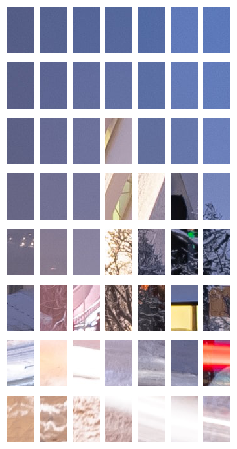

In [7]:
plt.figure(figsize=(4,8))
shW, shH = ImgRT.shape[0], ImgRT.shape[1]

for i, j in itertools.product(range(shW), range(shH)) :
    plt.subplot(shW, shH, i*shH + j + 1)
    plt.imshow(ImgRT[i,j,0,0])
    plt.axis('off')
plt.show()